# Lab 2: graphical analysis of difference equations

## Name: Robert Sucholeiki

### Lab section: Friday

In [62]:
#Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities

## Introduction

In this lab assignment we will use graphical methods to analyze discrete-time dynamic models and predict the behavior of their solutions. in particular population models with linear growth rates. In this assignment you will implement iterative solutions of these models and plot these solutions over time. There is also an exploratory part of the assignment, in which you will investigate the effect of stochasticity on population growth, found in lab2_code_examples.ipnyb

You will need the following python coding skills,  which are illustrated in the lab2_code_examples.ipynb
 
 - Defining a function 
 - Plotting the updating functions of a discrete-time dynamic model
 - Producing a cobweb plot of solutions based on the plot of the updating function

## Part 1: linear population model

Let us take the linear model with a constant term:

$$ N(t+1)=rN(t)+a $$

**1.1**

1. Define a python function values with three inputs: N, r, and a that returns the value of the updating function above

2. For parameter values $r=0.9$ and $a=10$, plot the updating function along with the identity line over a wide enough range to include all fixed point(s)

3. Based on the plot, identify the fixed point(s) and determine their stability.

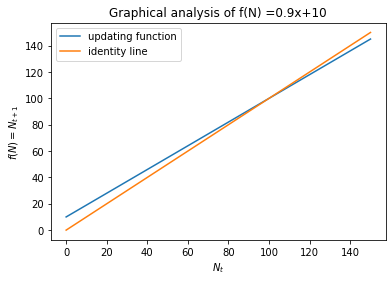

In [63]:
#Define a function that returns the value of the updating function
def linear_func(r, N, a):
    return(r*N+a)

#Define parameter values
a = 10
r = .9
N = np.linspace(0,150,150)#Create an array of N values
fN = linear_func(r, N, a) #Define values of the updating function

plt.plot(N, fN, label = 'updating function') # Plot the updating function
plt.plot(N, N, label = 'identity line') #Plot the identity line
plt.xlabel('$N_t$')
plt.ylabel('$f(N)=N_{t+1}$')
plt.title('Graphical analysis of f(N) =' +str(r)+ 'x+' +str(a))
plt.legend()
plt.show()



From our graphical analysis, we identify one fixed point at N = 100. This is where the updating function and the identity line intersect. The fixed point is stable because the slope of the updating function is less than the identity line. For a linear dynamic growth model, a stable fixed point occurs when |r| < 1. Here, r = .9, so we know that the fixed point is stable. 

**1.2** Using the function you created, make one cobweb plot of the model for each fixed point to illustrate its stability. For example, if there is a stable fixed point at 30, show a plot of a solution starting substantially above or below it (e.g. 70) and converging to it.

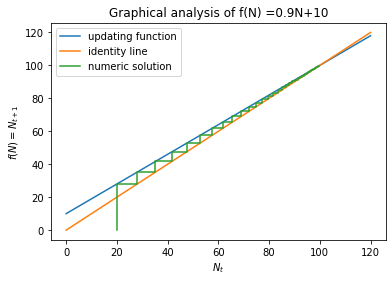

In [64]:
#Define a function that returns the value of the updating function
def linear_func(r, N, a):
    return(r*N+a)

#Define parameter values
a = 10
r = .9
N = np.linspace(0,120,120)#Create an array of N values
fN = linear_func(r, N, a) #Define values of the updating function

plt.plot(N, fN, label = 'updating function') # Plot the updating function
plt.plot(N, N, label = 'identity line') #Plot the identity line

#Create a cobweb plot
n = 50 # number of steps
N = np.zeros(n*2)
y = np.zeros(n*2)
N[0] = 20
for i in np.arange(0,2*(n-1),2):
    N[i+1] = N[i] # keep the same x coordinate
    y[i+1] = linear_func(r,N[i],a)# the updating function
    N[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
N[2*n-1] = N[2*n-2] # finish the last half-iteration
y[2*n-1] = linear_func(r,N[2*n-2],a) # finish the last half-iteration

plt.plot(N,y, label = 'numeric solution')   


plt.xlabel('$N_t$')
plt.ylabel('$f(N)=N_{t+1}$')
plt.title('Graphical analysis of f(N) =' +str(r)+ 'N+' +str(a))
plt.legend()
plt.show()



**1.3** Compute numeric solutions of the same model starting with the same initial value(s) you used in the cobweb plot(s), plot them over time, and describe how the behavior depends on initial value.

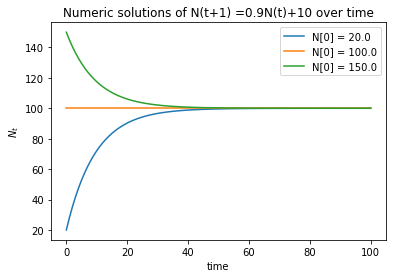

In [65]:
#For N[0] = 20
numsteps = 100 #number of time steps
r = .9 
a = 10
N = np.zeros(numsteps + 1) #Create a solution array for population values
N[0] = 20  #Set initial population as 20 individuals
for i in range(numsteps): #Create a for loop to propagate the system for 20 timesteps
    N[i+1] = linear_func(r, N[i], a)
t = np.arange(numsteps + 1) #Create a time vector
plt.plot(t,N, label = 'N[0] = '+str(N[0])) #Plot N as a function of time

#For N[0] =  100
N = np.zeros(numsteps + 1) #Create a solution array for population values
N[0] = 100 #Set initial population as 100 individuals
for i in range(numsteps): #Create a for loop to propagate the system for 20 timesteps
    N[i+1] = linear_func(r, N[i], a)
t = np.arange(numsteps + 1) #Create a time vector
plt.plot(t,N, label = 'N[0] = '+str(N[0])) #Plot N as a function of time

#For N[0] =  150
N = np.zeros(numsteps + 1) #Create a solution array for population values
N[0] = 150 #Set initial population as 150 individuals
for i in range(numsteps): #Create a for loop to propagate the system for 20 timesteps
    N[i+1] = linear_func(r, N[i], a)
t = np.arange(numsteps + 1) #Create a time vector
plt.plot(t,N, label = 'N[0] = '+str(N[0])) #Plot N as a function of time

plt.xlabel('time')
plt.ylabel('$N_t$')
title = 'Numeric solutions of N(t+1) =' +str(r)+ 'N(t)+' +str(a) + ' over time'
plt.title(title)
plt.legend()
plt.show()


For this dynamic growth model, no matter the initial population value, the population converges to a stable fixed point of N = 100 individuals. As we see in the plot above, initial values of N[0] = 20, N[0] = 100, and N[0] = 150 all converge to N(t) = 100 at large values of t.

## Part 2: natural selection in a haploid population

The following model describes the *frequency* $P$ of an allele $A$ in a haploid population, with parameter $V_A$ representing the *relative fitness* of $A$ compared to another allele $a$:

$$ P(t+1) = \frac{V_A P(t)}{V_A P(t) + (1 - P(t))}$$

1. Define a Python function with two inputs (P and V) that returns the value of the updating function above

2. For the given parameter values, plot the updating function along with the identity line over the biologically relevant range of variable P (allele frequency)

3. Based on the plots, identify the fixed point(s) and determine their stability for each parameter value.

4. Make a cobweb plot for a solution starting at a value between 0 and 1.

**2.1**  Use $V=0.5$ and perform the analysis outlined above. Comment on how the cobweb plot illustrates the stability of the fixed points.

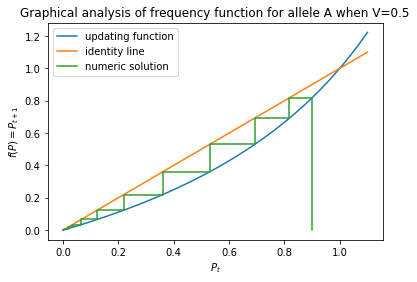

In [153]:
#Define a function that returns the value of the updating function
def frequency_func(P , V):
    return(V*P)/(V*P + (1 - P))

#Define parameter values
V = .5
P = np.linspace(0,1.1,110) #create an array of P values
fP = frequency_func(P,V) #Define values of the updating function

plt.plot(P, fP, label = 'updating function') # Plot the updating function
plt.plot(P, P, label = 'identity line') #Plot the identity line

#Create a cobweb plot
n = 50 # number of steps
P = np.zeros(n*2)
y = np.zeros(n*2)
P[0] = .9
for i in np.arange(0,2*(n-1),2):
    P[i+1] = P[i] # keep the same x coordinate
    y[i+1] = frequency_func(P[i], V)# the updating function
    P[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
P[2*n-1] = P[2*n-2] # finish the last half-iteration
y[2*n-1] = frequency_func(P[i], V) # finish the last half-iteration

plt.plot(P,y, label = 'numeric solution')   


plt.xlabel('$P_t$')
plt.ylabel('$f(P)=P_{t+1}$')
plt.title('Graphical analysis of frequency function for allele A when V=' + str(V))
plt.legend()
plt.show()


Here, we observe two fixed points where the updating function intersects the identity line. The fixed points occur at P = 0 and P = 1.

The fixed point at P = 0 is stable because we see that the values of the cobweb plot converge to P = 0 when we pick an initial value of 0 < P < 1. We also know this by the fact that the slope of the updating function is smaller in magnitude than the slope of the identity line at this point.

The fixed point at P = 1 is unstable because any value of P < 1 will diverge from 1, as shown by the cobweb plot. We also verify this by the fact that the slope of the updating function is larger in magnitude than the slope of the identity line as it passes through this point.

This intuitively makes sense for V = .5 because we know that the allele we are looking at, A, has a lower relative fitness compared to a in the gene pool. Therefore, for any frequency P < 1, the allele A will eventually become extinct due to natural selection over time. 

**2.2**  Use $V=2$ and perform the analysis outlined above. Comment on how the cobweb plot illustrates the stability of the fixed points.

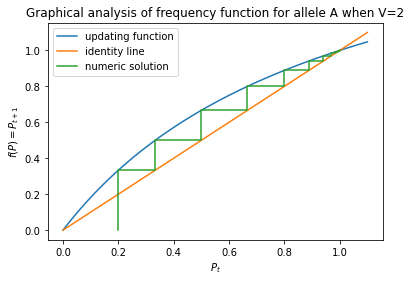

In [152]:
#Define a function that returns the value of the updating function
def frequency_func(P , V):
    return(V*P)/(V*P + (1 - P))

#Define parameter values
V = 2
P = np.linspace(0,1.1,110) #create an array of P values
fP = frequency_func(P,V) #Define values of the updating function

plt.plot(P, fP, label = 'updating function') # Plot the updating function
plt.plot(P, P, label = 'identity line') #Plot the identity line

#Create a cobweb plot
n = 50 # number of steps
P = np.zeros(n*2)
y = np.zeros(n*2)
P[0] = .2
for i in np.arange(0,2*(n-1),2):
    P[i+1] = P[i] # keep the same x coordinate
    y[i+1] = frequency_func(P[i], V)# the updating function
    P[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
P[2*n-1] = P[2*n-2] # finish the last half-iteration
y[2*n-1] = frequency_func(P[i], V) # finish the last half-iteration

plt.plot(P,y, label = 'numeric solution')   


plt.xlabel('$P_t$')
plt.ylabel('$f(P)=P_{t+1}$')
plt.title('Graphical analysis of frequency function for allele A when V=' + str(V))
plt.legend()
plt.show()

Once again, we observe two fixed points where the updating function intersects the identity line. The fixed points occur at P = 0 and P = 1.

The fixed point at P = 0 is unstable because any value of P > 0 will diverge from 0, as shown by the cobweb plot.

The fixed point at P = 1 is stable because we see that the values of the cobweb plot converge to P = 1 when we pick an initial value for 0 < P < 1.

This intuitively makes sense for V = 2 because we know that the allele we are looking at, A, has a higher relative fitness compared to a in the gene pool. Therefore, for any frequency P < 1, the allele A will eventually reach a frequency of P = 1 as the other allele, a, becomes extinct through natural selection.

**2.3** Compute numeric solutions of the model (using the code template from lab 1) for $V=0.5$ and $V=2$, starting with the same initial value(s) you used in the cobweb plot(s), plot them over time, and describe how the behavior depends on initial value. Explain how the parameter $V$ controls the stability of the fixed point(s) and provide a brief biological explanation.

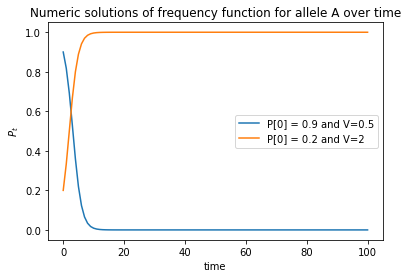

In [84]:
#For V = .5
#P[0] = .9
numsteps = 100 #number of time steps
V = .5
P = np.zeros(numsteps + 1) #Create a solution array for frequency values
P[0] = .9 #Set initial frequency as 20 individuals
for i in range(numsteps): #Create a for loop to propagate the system for 20 timesteps
    P[i+1] = frequency_func(P[i],V)
t = np.arange(numsteps + 1) #Create a time vector
plt.plot(t,P, label = 'P[0] = '+str(P[0]) + ' and V=' + str(V)) #Plot N as a function of time

#For V = 2
#P[0] = .2
numsteps = 100 #number of time steps
V = 2
P = np.zeros(numsteps + 1) #Create a solution array for frequency values
P[0] = .2 #Set initial frequency as 20 individuals
for i in range(numsteps): #Create a for loop to propagate the system for 20 timesteps
    P[i+1] = frequency_func(P[i],V)
t = np.arange(numsteps + 1) #Create a time vector
plt.plot(t,P, label = 'P[0] = '+str(P[0]) + ' and V=' + str(V)) #Plot N as a function of time

plt.xlabel('time')
plt.ylabel('$P_t$')
title = 'Numeric solutions of frequency function for allele A over time'
plt.title(title)
plt.legend()
plt.show()


The parameter V determines which fixed point (either P = 0 or P = 1) is the stable fixed point. If V < 1, then P = 0 is the stable fixed point and thus all values of P for P < 1 will converge to P = 0 at increasing time. If V > 1, then P = 1 is the stable fixed point and thus all values of P for P > 0 will converge to P = 1 at increasing time. 

The reason for this is that biologically, V is the ratio of the fitness of allele A divided by the fitness of the other allele in the population (a). When V < 1, individuals with A have a lower fitness than individuals with a, so allele A is disadvantagous. In this senario, allele A will eventually become extinct from the population as long as its starting frequency is less than 1, due to natural selection (individuals with allele A are not able to survive and/or reproduce as readily as individuals with allele a).

In this senario of V < 1, a starting value of P = 1 will remain as an unstable fixed point because in that case A would be the only allele present for all time. All other starting values for P < 1 will converge to P = 0.

Conversely, when V > 1, individuals with allele A have a higher fitness than individuals with allele a, so allele A is advantagous. In this senario, allele A will eventually become the only allele in the population as long as its starting frequency is greater than 0, due to natural selection (individuals with allele A able to survive and/or reproduce more successfully than individuals with allele a).

In this senario of V > 1, a starting value of P = 0 will remain as an unstable fixed point because in that case A would not exist in the population for all time. All other starting values for P > 0 will converge to P = 1.

## Part 3: logistic population model


Consider the logistic population model of the form

$$ N(t+1) = N(t) (r - sN(t)) $$

where $r$ is the *instrinsic growth rate* and $s$ is the *population dependence* parameter. Define a Python function for this model and use it for the tasks below.


**3.1** Set $r=1.5$; explore a range of positive values of $s$ along a reasonable range. For each value of $s$ make graphs of the updating function that include both fixed points with cobweb plots to illustrate the dynamics of the solution that starts between the two fixed points. In your report pick a few (2-4) values of $s$ to illustrate your exploration and produce the above-mentioned plots; describe how changing the parameter $s$ impacts the qualitative behavior of solutions of the model (do they converge to a fixed poin, diverge to infinity, bounce around, etc.)

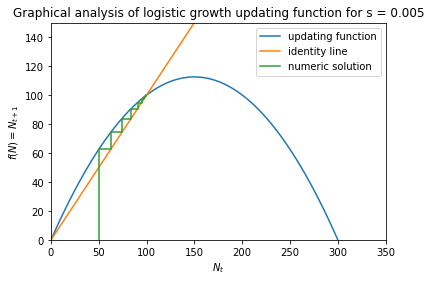

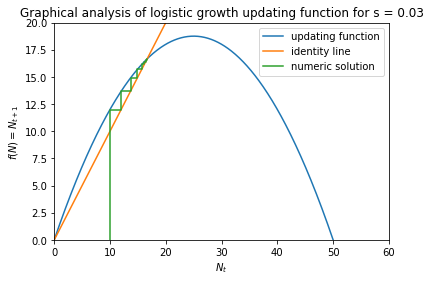

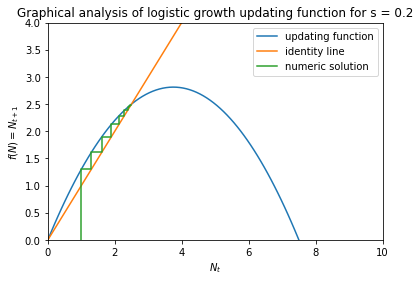

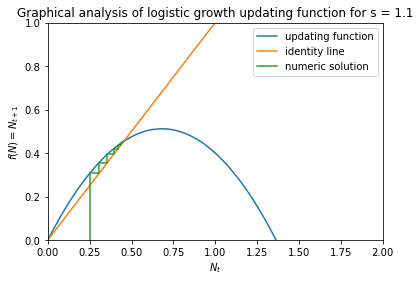

In [154]:
#Define a function that returns the value of the updating function
def logistic_func(r, N, s):
    return(N*(r - s*N))

r = 1.5 #Set r = 1.5


#PLOT 1: s = .005
s = .005
N = np.linspace(0,350,350) #create an array of N values
fN =  logistic_func(r, N, s) #Define values of the updating function
plt.plot(N, fN, label = 'updating function') # Plot the updating function
plt.plot(N, N, label = 'identity line') #Plot the identity line

#Create a cobweb plot
n = 10 # number of steps
N = np.zeros(n*2)
y = np.zeros(n*2)
N[0] = 50
for i in np.arange(0,2*(n-1),2):
    N[i+1] = N[i] # keep the same x coordinate
    y[i+1] = logistic_func(r,N[i],s)# the updating function
    N[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
N[2*n-1] = N[2*n-2] # finish the last half-iteration
y[2*n-1] = logistic_func(r,N[2*n-2],s) # finish the last half-iteration

plt.plot(N,y, label = 'numeric solution')  


plt.xlabel('$N_t$')
plt.ylabel('$f(N)=N_{t+1}$')
plt.title('Graphical analysis of logistic growth updating function for s = ' + str(s))
plt.legend()
plt.ylim(0,150)
plt.xlim(0,350)
plt.show()



#PLOT 2: s = .03
s = .03
N = np.linspace(0,50,500) #create an array of N values
fN =  logistic_func(r, N, s) #Define values of the updating function
plt.plot(N, fN, label = 'updating function') # Plot the updating function
plt.plot(N, N, label = 'identity line') #Plot the identity line

#Create a cobweb plot
n = 10 # number of steps
N = np.zeros(n*2)
y = np.zeros(n*2)
N[0] = 10
for i in np.arange(0,2*(n-1),2):
    N[i+1] = N[i] # keep the same x coordinate
    y[i+1] = logistic_func(r,N[i],s)# the updating function
    N[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
N[2*n-1] = N[2*n-2] # finish the last half-iteration
y[2*n-1] = logistic_func(r,N[2*n-2],s) # finish the last half-iteration

plt.plot(N,y, label = 'numeric solution')  


plt.xlabel('$N_t$')
plt.ylabel('$f(N)=N_{t+1}$')
plt.title('Graphical analysis of logistic growth updating function for s = ' + str(s))
plt.legend()
plt.ylim(0,20)
plt.xlim(0,60)
plt.show()


#PLOT 3: s = .2
s = .2
N = np.linspace(0,10,100) #create an array of N values
fN =  logistic_func(r, N, s) #Define values of the updating function
plt.plot(N, fN, label = 'updating function') # Plot the updating function
plt.plot(N, N, label = 'identity line') #Plot the identity line

#Create a cobweb plot
n = 10 # number of steps
N = np.zeros(n*2)
y = np.zeros(n*2)
N[0] = 1
for i in np.arange(0,2*(n-1),2):
    N[i+1] = N[i] # keep the same x coordinate
    y[i+1] = logistic_func(r,N[i],s)# the updating function
    N[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
N[2*n-1] = N[2*n-2] # finish the last half-iteration
y[2*n-1] = logistic_func(r,N[2*n-2],s) # finish the last half-iteration

plt.plot(N,y, label = 'numeric solution')  


plt.xlabel('$N_t$')
plt.ylabel('$f(N)=N_{t+1}$')
plt.title('Graphical analysis of logistic growth updating function for s = ' + str(s))
plt.legend()
plt.ylim(0,4)
plt.xlim(0,10)
plt.show()



#PLOT 4: s = 1.1
s = 1.1
N = np.linspace(0,2,100) #create an array of N values
fN =  logistic_func(r, N, s) #Define values of the updating function
plt.plot(N, fN, label = 'updating function') # Plot the updating function
plt.plot(N, N, label = 'identity line') #Plot the identity line

#Create a cobweb plot
n = 10 # number of steps
N = np.zeros(n*2)
y = np.zeros(n*2)
N[0] = .25
for i in np.arange(0,2*(n-1),2):
    N[i+1] = N[i] # keep the same x coordinate
    y[i+1] = logistic_func(r,N[i],s)# the updating function
    N[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
N[2*n-1] = N[2*n-2] # finish the last half-iteration
y[2*n-1] = logistic_func(r,N[2*n-2],s) # finish the last half-iteration

plt.plot(N,y, label = 'numeric solution')  


plt.xlabel('$N_t$')
plt.ylabel('$f(N)=N_{t+1}$')
plt.title('Graphical analysis of logistic growth updating function for s = ' + str(s))
plt.legend()
plt.ylim(0,1)
plt.xlim(0,2)
plt.show()


In all of the following s parameters chosen: s = .005, s = .03, s = .2, and s = 1.1, we see that the populations have two fixed points. There is one fixed point at N = 0 and another fixed point at a positive value of N where the updating function intersects the identity line. In all cases, the positive N fixed point is stable; we can see that all cobweb plots from the initial values converge to this fixed point. This is because the slope of the updating function parabola at this point is smaller than the slope of the identity line. Furthermore, in all cases the fixed point lies to the left of the vertex of the parabola. 

The fixed point at N = 0 is shown to be always unstable in these cases, as the cobweb plots from the initial values always diverge from zero. This is because the slope of the parabola at this point is greater than the slope of the identity line.

In all cases, then, solutions converge to the stable fixed point. The magnitude of this stable fixed point is inversely related to s; the larger the positive s parameter, the smaller the magnitude of the positive fixed point. 

**3.2** Set $s= 0.05$; vary $r$ along a range of positive values (e.g. between 0 and 5). For each value of $r$ make a graph of the updating function that includes both fixed points with cobweb plots to illustrate the dynamics of the solution that starts between the two fixed points. In your report pick a few (2-4) values of $r$ to illustrate your exploration and produce the above-mentioned plots; describe how changing the parameter $r$ impacts the qualitative behavior of solutions of the model (do they converge to a fixed poin, diverge to infinity, bounce around, etc.

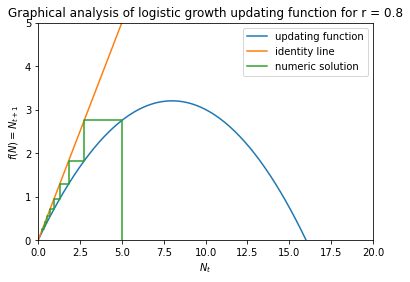

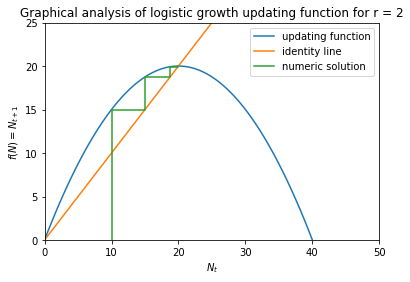

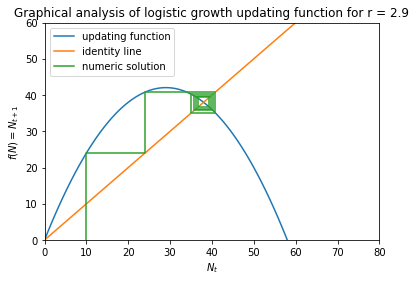

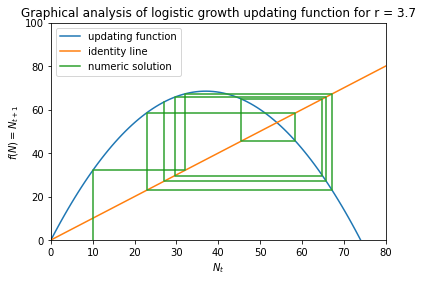

In [192]:
#Define a function that returns the value of the updating function
def logistic_func(r, N, s):
    return(N*(r - s*N))

s = .05 #Set s = .05


#PLOT 1: r = .5
r = .8
N = np.linspace(0,20,200) #create an array of N values
fN =  logistic_func(r, N, s) #Define values of the updating function
plt.plot(N, fN, label = 'updating function') # Plot the updating function
plt.plot(N, N, label = 'identity line') #Plot the identity line

#Create a cobweb plot
n = 10 # number of steps
N = np.zeros(n*2)
y = np.zeros(n*2)
N[0] = 5
for i in np.arange(0,2*(n-1),2):
    N[i+1] = N[i] # keep the same x coordinate
    y[i+1] = logistic_func(r,N[i],s)# the updating function
    N[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
N[2*n-1] = N[2*n-2] # finish the last half-iteration
y[2*n-1] = logistic_func(r,N[2*n-2],s) # finish the last half-iteration

plt.plot(N,y, label = 'numeric solution')  


plt.xlabel('$N_t$')
plt.ylabel('$f(N)=N_{t+1}$')
plt.title('Graphical analysis of logistic growth updating function for r = ' + str(r))
plt.legend()
plt.ylim(0,5)
plt.xlim(0,20)
plt.show()



#PLOT 2: r = 2
r = 2
N = np.linspace(0,50,100) #create an array of N values
fN =  logistic_func(r, N, s) #Define values of the updating function
plt.plot(N, fN, label = 'updating function') # Plot the updating function
plt.plot(N, N, label = 'identity line') #Plot the identity line

#Create a cobweb plot
n = 10 # number of steps
N = np.zeros(n*2)
y = np.zeros(n*2)
N[0] = 10
for i in np.arange(0,2*(n-1),2):
    N[i+1] = N[i] # keep the same x coordinate
    y[i+1] = logistic_func(r,N[i],s)# the updating function
    N[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
N[2*n-1] = N[2*n-2] # finish the last half-iteration
y[2*n-1] = logistic_func(r,N[2*n-2],s) # finish the last half-iteration

plt.plot(N,y, label = 'numeric solution')  


plt.xlabel('$N_t$')
plt.ylabel('$f(N)=N_{t+1}$')
plt.title('Graphical analysis of logistic growth updating function for r = ' + str(r))
plt.legend()
plt.ylim(0,25)
plt.xlim(0,50)
plt.show()



#PLOT 3: r = 3.0
r = 2.9
N = np.linspace(0,80,100) #create an array of N values
fN =  logistic_func(r, N, s) #Define values of the updating function
plt.plot(N, fN, label = 'updating function') # Plot the updating function
plt.plot(N, N, label = 'identity line') #Plot the identity line

#Create a cobweb plot
n = 10 # number of steps
N = np.zeros(n*2)
y = np.zeros(n*2)
N[0] = 10
for i in np.arange(0,2*(n-1),2):
    N[i+1] = N[i] # keep the same x coordinate
    y[i+1] = logistic_func(r,N[i],s)# the updating function
    N[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
N[2*n-1] = N[2*n-2] # finish the last half-iteration
y[2*n-1] = logistic_func(r,N[2*n-2],s) # finish the last half-iteration

plt.plot(N,y, label = 'numeric solution')  


plt.xlabel('$N_t$')
plt.ylabel('$f(N)=N_{t+1}$')
plt.title('Graphical analysis of logistic growth updating function for r = ' + str(r))
plt.legend()
plt.ylim(0,60)
plt.xlim(0,80)
plt.show()



#PLOT 4: r = 3.7
r = 3.7
N = np.linspace(0,80,100) #create an array of N values
fN =  logistic_func(r, N, s) #Define values of the updating function
plt.plot(N, fN, label = 'updating function') # Plot the updating function
plt.plot(N, N, label = 'identity line') #Plot the identity line

#Create a cobweb plot
n = 10 # number of steps
N = np.zeros(n*2)
y = np.zeros(n*2)
N[0] = 10
for i in np.arange(0,2*(n-1),2):
    N[i+1] = N[i] # keep the same x coordinate
    y[i+1] = logistic_func(r,N[i],s)# the updating function
    N[i+2] = y[i+1] # move to the next x value
    y[i+2] = y[i+1] # keep the same y coordinate
N[2*n-1] = N[2*n-2] # finish the last half-iteration
y[2*n-1] = logistic_func(r,N[2*n-2],s) # finish the last half-iteration

plt.plot(N,y, label = 'numeric solution')  


plt.xlabel('$N_t$')
plt.ylabel('$f(N)=N_{t+1}$')
plt.title('Graphical analysis of logistic growth updating function for r = ' + str(r))
plt.legend()
plt.ylim(0,100)
plt.xlim(0,80)
plt.show()

From these plots, it is evident that r controls the stability of fixed points in these logistic growth models. Here, I tested four positive r values. I will summarize some cases from these observations to explain how changing the r parameter affects the qualitative solutions of the model:

When positive r < 1, we see a single stable fixed point in the non-negative x domain at N = 0. (Mathematically, there is actually a second fixed point at N < 0, but this does not have applications biologically, as you cannot have a "negative" population). So for r < 1, populations converge to a solution of 0.

When 1 < r < 2.8, there are two fixed points. There is a fixed point at 0 which is unstable. There is also a fixed point that intersects with the identity line in the positive x range, which is a stable fixed point (as shown by the cobweb plot converging to this fixed point). So for 1 < r < 2.8, the solution converge to a stable fixed point that is larger than zero. What's intersesting to observe is that as r becomes closer to 3, the population undergoes "oscillations" at large values of time as it approaches the fixed point.

When r > 2.8 (approximately), it appears that there are no stable fixed points. The solution diverges from the unstable fixed point at N = 0. However, the solution does not reach the second, positive unstable fixed point. Instead, the solution seems to oscillate around this fixed point, but does not reach it. This is a phenomena of "period oscillations" that seems to occur roughly arround 2.8 < r < 3.59

Finally, when r >= 3.6 (in my example I set r = 3.7), the solution enters a phenomenon in which there is no discernable pattern at increasing time. This is the phenomenon called chaos. Here, the solution bounces around in a chaotic manner. Like the previous senario, there are two unstable fixed points and no stable fixed points.

**3.3** Pick a combination of parameter values $r$ and $s$ that you found in your exploration above that produces chaotic behavior. Use these values to demonstrate the phenomenon of sensitive dependence on initial conditions by computing two numeric solutions starting from almost identical (e.g. different by 1e-5) initial conditions and plot them together over a long enough time frame to show their divergence.

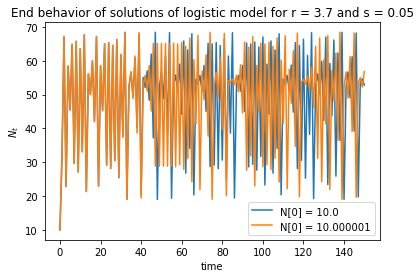

In [202]:
#Define a function that returns the value of the updating function
def logistic_func(r, N, s):
    return(N*(r - s*N))

#Pick parameters r = 3.7 and s = .05
r = 3.7
s = .05

#Solution for N = 10
numsteps = 150 #number of time steps
N = np.zeros(numsteps + 1) #Create a solution array for population values
N[0] = 10 #Set initial frequency as 20 individuals
for i in range(numsteps): #Create a for loop to propagate the system for 20 timesteps
    N[i+1] = logistic_func(r, N[i], s)
t = np.arange(numsteps + 1) #Create a time vector
plt.plot(t,N, label = 'N[0] = '+str(N[0])) #Plot N as a function of time


#Solution for N = 10.000001
numsteps = 150 #number of time steps
N = np.zeros(numsteps + 1) #Create a solution array for population values
N[0] = 10.000001 #Set initial frequency as 20 individuals
for i in range(numsteps): #Create a for loop to propagate the system for 20 timesteps
    N[i+1] = logistic_func(r, N[i], s)
t = np.arange(numsteps + 1) #Create a time vector
plt.plot(t,N, label = 'N[0] = '+str(N[0])) #Plot N as a function of time

plt.xlabel('time')
plt.ylabel('$N_t$')
title = 'End behavior of solutions of logistic model for r = ' + str(r) + ' and s = ' + str(s)
plt.title(title)
plt.legend()
plt.show()

Here, I picked parameters of r = 3.7 and s = .05 which were shown to cause chaotic behavior of the logistic solution. Here, the numerical solutions of this model are plotted for two initial values that differ by a very small amount: N[0] = 10.0 and N[0] = 10.000001. We see that after about t = 50, the solutions begin to diverge. This is shown by the divergence of the orange and blue solutions that no longer overlap well after t = 50. This demonstrates that the long term behavior of solutions to this chaos logistic model is extremely sensitive to the starting value, so that even extremely small differences will have a significant effect on the end behavior. 